The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.
Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.
User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
Number of Votes given Restaurant
Restaurant serving more number of cuisines.
Average Cost of Restaurant
Restaurant serving some specific cuisines.
Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .
Visualization
Plot the bar graph top 15 restaurants have a maximum number of outlets.
Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
Plot the bar graph top 10 restaurants in the data with the highest number of votes.
Plot the pie graph of top 10 cuisines present in restaurants in the USA.
Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('zomato.csv',encoding='latin-1')

In [2]:
df.dropna(inplace=True)
df.reset_index(inplace = True)

In [3]:
df
del df['index']


<function matplotlib.pyplot.show(close=None, block=None)>

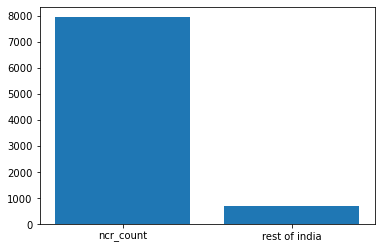

In [4]:
#df
india_df = df[df['Country Code'] == 1]
newdelhi_df=india_df[india_df['City']=='New Delhi']['City'].count()
ghaziabad_df=india_df[india_df['City']=='Ghaziabad']['City'].count()
noida_df=india_df[india_df['City']=='Noida']['City'].count()
gurgaon_df=india_df[india_df['City']=='Gurgaon']['City'].count()
faridabad_df=india_df[india_df['City']=='Faridabad']['City'].count()
ncr_count=newdelhi_df+ghaziabad_df+noida_df+gurgaon_df+faridabad_df
total_india=india_df['City'].count()
y = ncr_count,total_india - ncr_count
x = ['ncr_count','rest of india']
plt.bar(x,y)
plt.show

In [5]:
#cuisines which are not present in the ncr but present in rest of india 
#print(india_df)
target=['New Delhi','Ghaziabad','Faridabad','Noida','Gurgaon']
ncr_cuisines=india_df[(india_df['City']=='New Delhi') | (india_df['City']=='Noida')|(india_df['City']=='Ghaziabad')|(india_df['City']=='Gurgaon') | (india_df['City']=='Faridabad')]['Cuisines']
#print(ncr_cuisines)


In [6]:
lists = []
for ele in ncr_cuisines:
    #print(ele)
    
    for i in ele.split(','):
        j=[x.strip() for x in ele.split(',')]
    for i in j:
        lists.append(i)
#print(list)
#removing duplicates 

In [7]:
del list

NameError: name 'list' is not defined

In [8]:
list_ncr = set(lists)
#print(list_ncr)
list_ncr = list(list_ncr)

In [9]:
rest_cuisines=list(india_df[(india_df['City']!='New Delhi') | (india_df['City']!='Noida')|(india_df['City']!='Ghaziabad')|(india_df['City']!='Gurgaon') | (india_df['City']!='Faridabad')]['Cuisines'])
listss = []
#for cuisines which are not in ncr but rest of india 
for ele in rest_cuisines:
    j=[x.strip() for x in ele.split(',')]
    for k in j:
        #print(k)
        if k not in list_ncr:
            listss.append(k)
            #print(listss)
listss = list(set(listss))
#cuisines which are not in ncr are but in rest of india are 
for ele in listss: 
    print(ele)


BBQ
German
Cajun
Malwani


In [10]:
#using zomato api
import requests,json
header={'Accept':'application/json','user-key':'d35451bc6dc04b3662194e3fce301ced'}
response=requests.get('https://api.zomato.com/v2.1/cuisines',params={'city_id':1},headers=header)
r=response.json()
#print(response)
cuisine_in_ncr = []
for i in r['cuisines']:
    #print(i['cuisine']['cuisine_name'])
    cuisine_in_ncr.append(i['cuisine']['cuisine_name'])
cuisine_in_ncr = set(cuisine_in_ncr)
listss = set(listss)
print(listss - cuisine_in_ncr) # cuisines which are actually not in ncr according to zomato api


{'German', 'Cajun'}


In [57]:
dic = {}
for i in india_df['Cuisines']:
    for j in (i.split(',')):
        j = j.strip()
        #print(j)
        if j in dic:
            dic[j] += 1
        else :
            dic[j] = 1 
flag = 0 
print("Top 10 cuisines in india")
print()
for w in sorted(dic, key=dic.get, reverse=True):
    print(w, dic[w])
    flag += 1
    if flag == 10:
        break

Top 10 cuisines in india

North Indian 3946
Chinese 2690
Fast Food 1963
Mughlai 992
Bakery 726
Continental 724
Italian 682
South Indian 631
Cafe 627
Desserts 597


Top 10 restaurants in delhi ncr

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


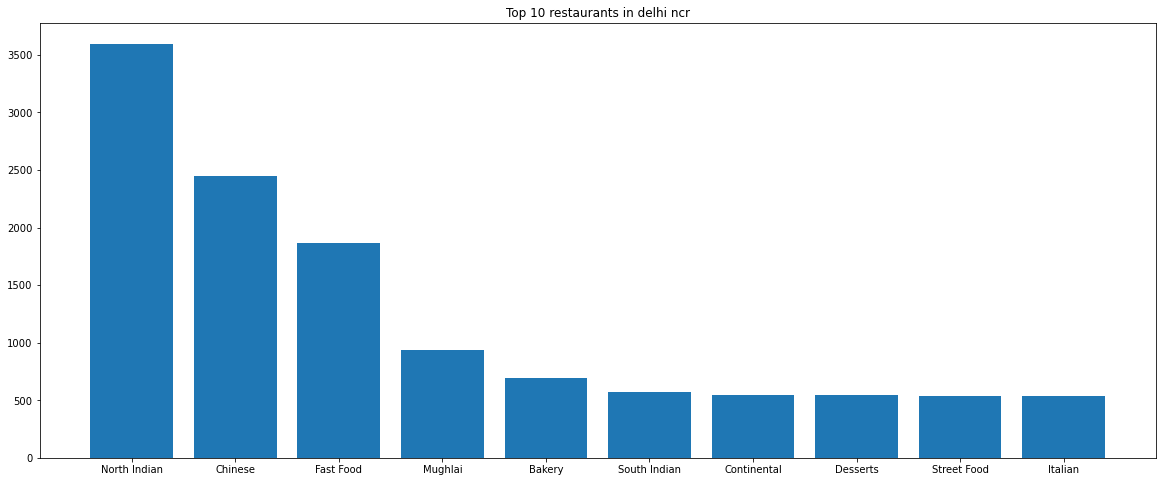

In [64]:
import matplotlib.pyplot as mp
l=list(zip(india_df['City'],india_df['Cuisines']))
target=['New Delhi','Noida','Gurgaon','Faridabad','Ghaziabad']
#print(len(l))
#print(l[1][0])
dic = {}
for i in range(len(l)):
    if l[i][0] in target:
        for j in l[i][1].split(','):
            j = j.strip()
            if j in dic:
                dic[j] += 1
            else :
                dic[j] = 1
flag = 0
print("Top 10 restaurants in delhi ncr")
print()
x_axis = []
y_axis = []
for w in sorted(dic, key=dic.get, reverse=True):
    print(w, dic[w])
    x_axis.append(w)
    y_axis.append(dic[w])
    flag += 1
    if flag == 10:
        break
mp.subplots(figsize=(20,8))
mp.bar(x_axis,y_axis)
mp.title('Top 10 restaurants in delhi ncr')
mp.show()

top 10 restaurants in rest of india

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


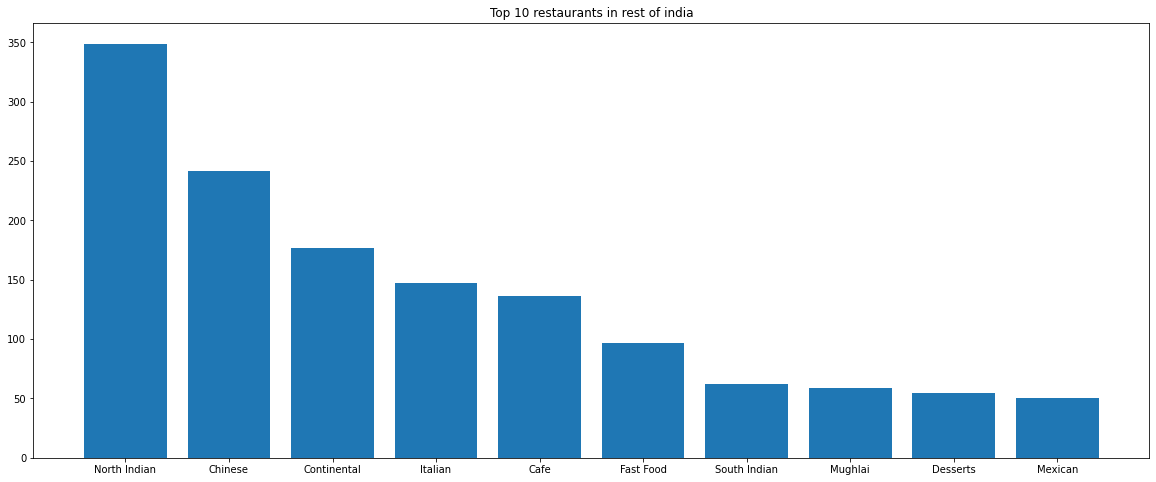

In [66]:
l=list(zip(india_df['City'],india_df['Cuisines']))
target=['New Delhi','Noida','Gurgaon','Faridabad','Ghaziabad']
#print(len(l))
#print(l[1][0])
dic = {}
for i in range(len(l)):
    if l[i][0] not in target:
        for j in l[i][1].split(','):
            j = j.strip()
            if j in dic:
                dic[j] += 1
            else :
                dic[j] = 1
flag = 0
print("top 10 restaurants in rest of india")
print()
x_axis = []
y_axis = []
for w in sorted(dic, key=dic.get, reverse=True):
    print(w, dic[w])
    x_axis.append(w)
    y_axis.append(dic[w])
    flag += 1
    if flag == 10:
        break
mp.subplots(figsize=(20,8))
mp.bar(x_axis,y_axis)
mp.title('Top 10 restaurants in rest of india')
mp.show()

In [77]:
# Question 2 


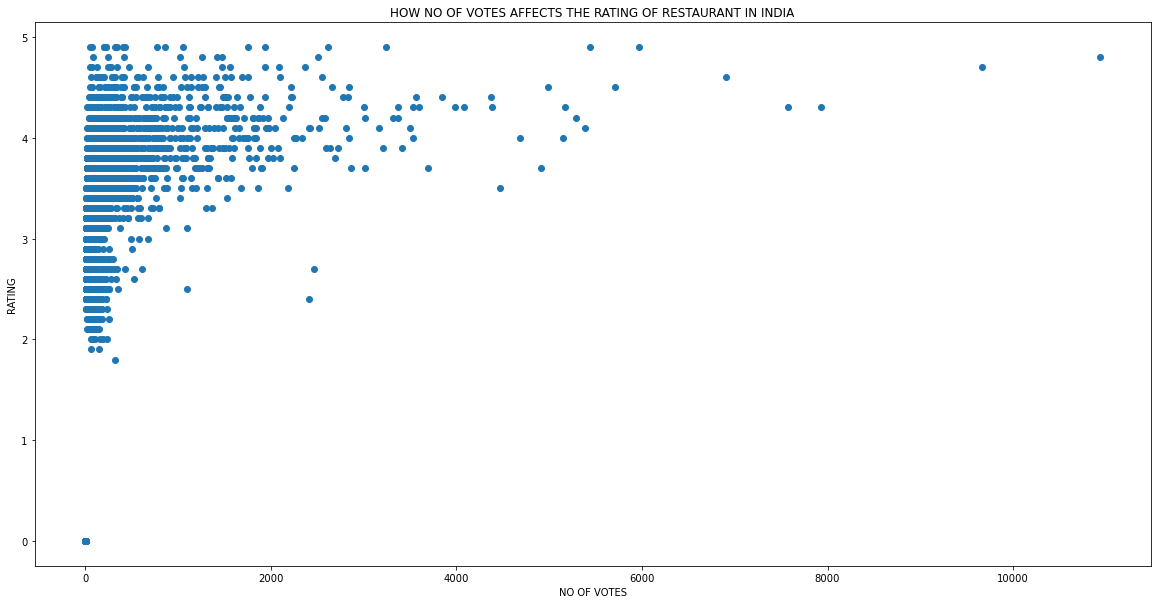

for more number of votes the rating is usually higher than 3.51, and for less number of votes it is varying from 1.8 to 4.8


In [79]:
l=list(zip(india_df['Aggregate rating'],india_df['Votes']))
#print(l)
x_axis = []
y_axis = []
for i in range(len(l)):
    x_axis.append(l[i][1])
    y_axis.append(l[i][0])
#mp.bar
mp.subplots(figsize=(20,10))
mp.scatter(x_axis,y_axis)
mp.ylabel('RATING')
mp.xlabel('NO OF VOTES')
mp.title('HOW NO OF VOTES AFFECTS THE RATING OF RESTAURANT IN INDIA')
mp.show()
print("for more number of votes the rating is usually higher than 3.51, and for less number of votes it is varying from 1.8 to 4.8")


<ipython-input-86-2484fb65632b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df['count']=india_df['Cuisines'].apply(f)


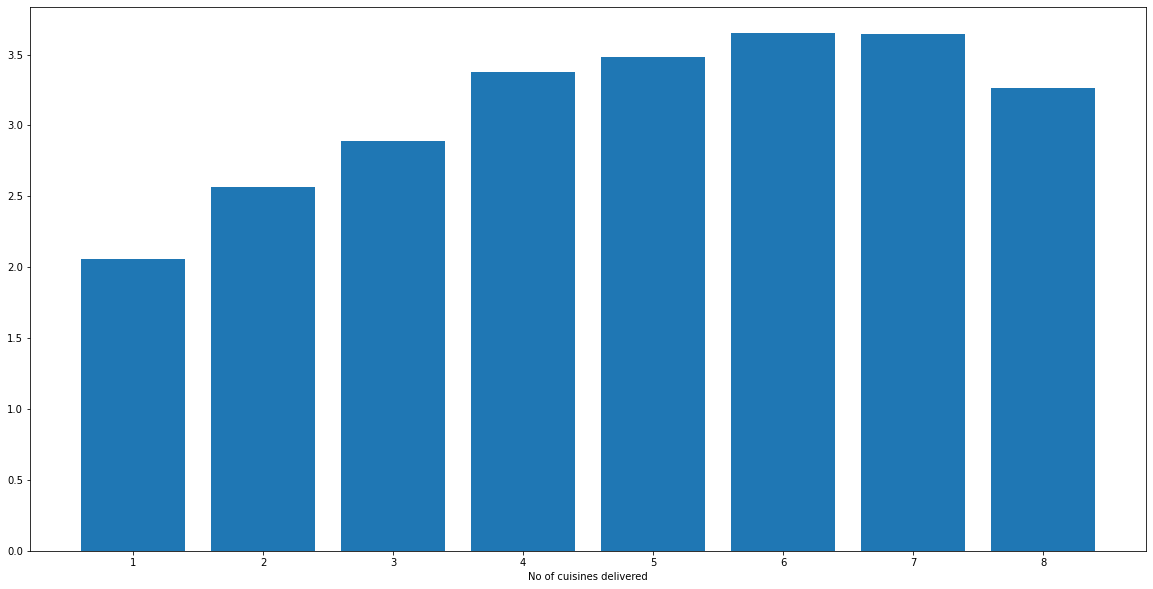

restaurants serving more cusines have more rating than the restauratns serving less cuisines


In [86]:

def f(data):
    li=data.split(',')
    return(len(li))
    

india_df['count']=india_df['Cuisines'].apply(f)
get_count=india_df['count'].value_counts()

li=list(zip(india_df['Aggregate rating'],india_df['count']))
d={}
x=[]
y=[]
for ele in li:
    if ele[1] not in d:
        d[ele[1]]=[ele[0]]
    else:
        d[ele[1]].append(ele[0])
for key in d:
    d[key]=sum(d[key])/len(d[key])
for key in d:
    x.append(key)
    y.append(d[key])
mp.subplots(figsize=(20,10))
mp.xlabel('No of cuisines delivered')
mp.ylabel('')
mp.bar(x,y)
mp.show()
print("restaurants serving more cusines have more rating than the restauratns serving less cuisines")

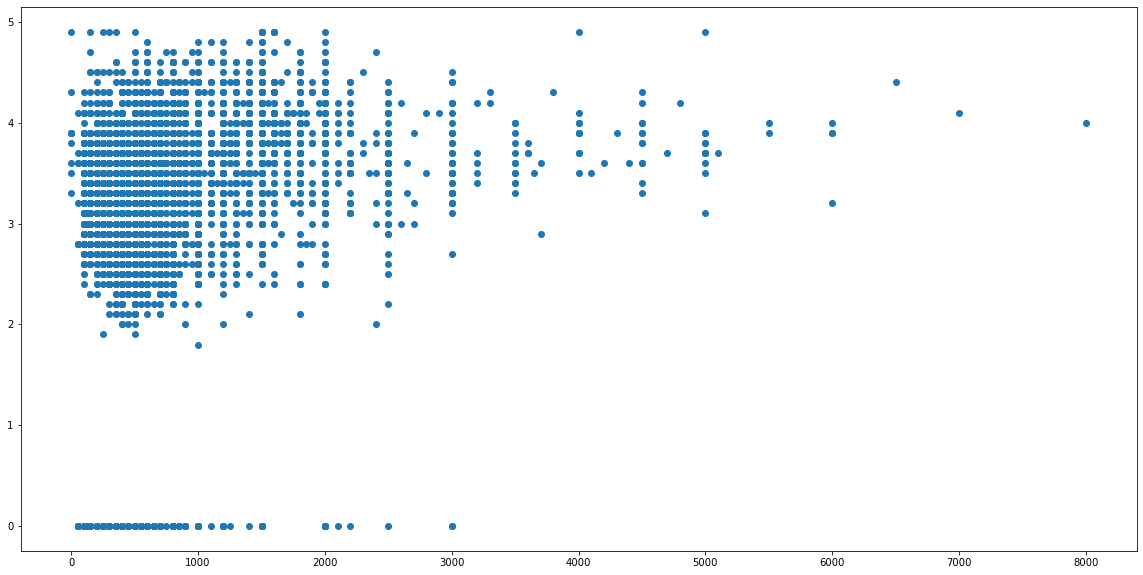

In [88]:

l=list(zip(india_df['Aggregate rating'],india_df['Average Cost for two']))
x=[]
y=[]
for i in range(len(l)):
    x.append(l[i][0])
    y.append(l[i][1])
plt.subplots(figsize=(20,10))
plt.scatter(y,x)
plt.show()
print("for the restaurants which less average cost rating is varied from 2 to 4.9 for the higher average cost restaurans they have the rating around 4")

In [96]:
dicti = {}
for i in india_df['Cuisines']:
    for j in (i.split(',')):
        j = j.strip()
        #print(j)
        if j in dic:
            dicti[j] += 1
        else :
            dicti[j] = 1 
flag = 0 
print("Top 10 cuisines in india")
print()
for w in sorted(dic, key=dic.get, reverse=True):
    print(w, dict[w])
    flag += 1
    if flag == 10:
        break

Top 10 cuisines in india

North Indian 3946
Chinese 2690
Fast Food 1963
Mughlai 992
Bakery 726
Continental 724
Italian 682
South Indian 631
Cafe 627
Desserts 597


In [98]:
for i in dicti :
    print(i)

North Indian
Mughlai
Rajasthani
Chinese
European
Gujarati
Continental
South Indian
Desserts
Cafe
Italian
Mexican
Pizza
Fast Food
Mediterranean
Thai
Ice Cream
Beverages
Asian
Street Food
Sandwich
Burger
Healthy Food
American
Armenian
Salad
Bakery
Mithai
Biryani
Juices
Maharashtrian
Hyderabadi
Modern Indian
Finger Food
Tex-Mex
Arabian
Charcoal Grill
Steak
Seafood
Tea
Japanese
Malaysian
Burmese
Chettinad
Spanish
Greek
Indian
Parsi
Tibetan
Raw Meats
French
Goan
German
Kerala
Lebanese
Belgian
Kashmiri
Sushi
South American
Persian
Bengali
Portuguese
African
Iranian
Vietnamese
Lucknowi
Korean
Awadhi
Nepalese
Drinks Only
Pakistani
North Eastern
Oriya
Bihari
Afghani
Middle Eastern
Indonesian
Assamese
Andhra
Mangalorean
British
Malwani
Cuisine Varies
Turkish
Moroccan
Naga
Deli
Sri Lankan
BBQ
Cajun


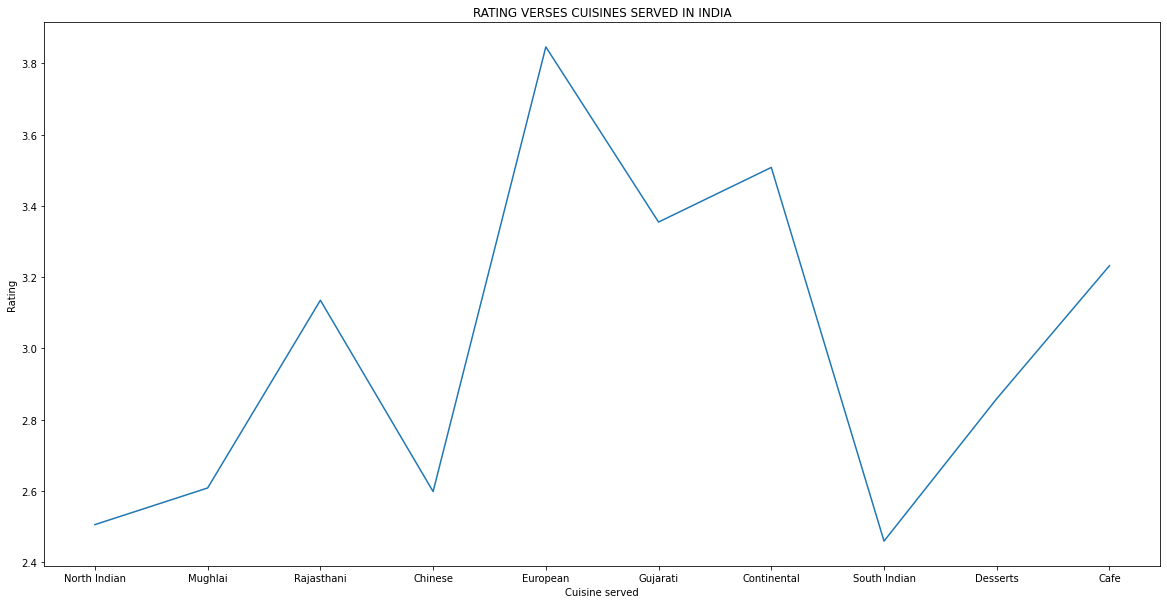

In [101]:

l=list(zip(india_df['Cuisines'],india_df['Aggregate rating']))
d={}
flag = 0
for curr in dic:
    sum=0
    count=0
    for i in range(len(l)):
        if curr in l[i][0]:
            sum+=l[i][1]
            count+=1
    d[curr]=(sum/count)
    flag += 1
    if flag == 10 :
        break
        
x=[]
y=[]
for curr in d:
    x.append(curr)
    y.append(d[curr])
mp.subplots(figsize=(20,10))
mp.title('RATING VERSES CUISINES SERVED IN INDIA')
mp.xlabel('Cuisine served')
mp.ylabel('Rating')
mp.plot(x,y)
mp.show()
print("restaurants serving european and continental has the highest rating whereas the restaurants serving south indian and north indian cuisines has very low rating ")

In [103]:
india_df=india_df.copy()
india_df['weighted_average']=india_df['Votes']*india_df['Aggregate rating']
l=list(zip(india_df['Locality'],india_df['weighted_average']))
s=india_df['Votes'].sum()
d={}
ind=[ele[0] for ele in l]
for val in ind:
    key=india_df[india_df['Locality']==val]['weighted_average'].sum()
    v=india_df[india_df['Locality']==val]['Votes'].sum()
    if v==0:
        continue
    d[val]=(key/v)
#d =dict(sorted(dic, key=dic.get, reverse=True))

Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Banjara Hills 4.7187617260787995
Sector 5, Salt Lake 4.707022552098202
Riverside Mall, Gomti Nagar 4.7
Jubilee Hills 4.623518181818182


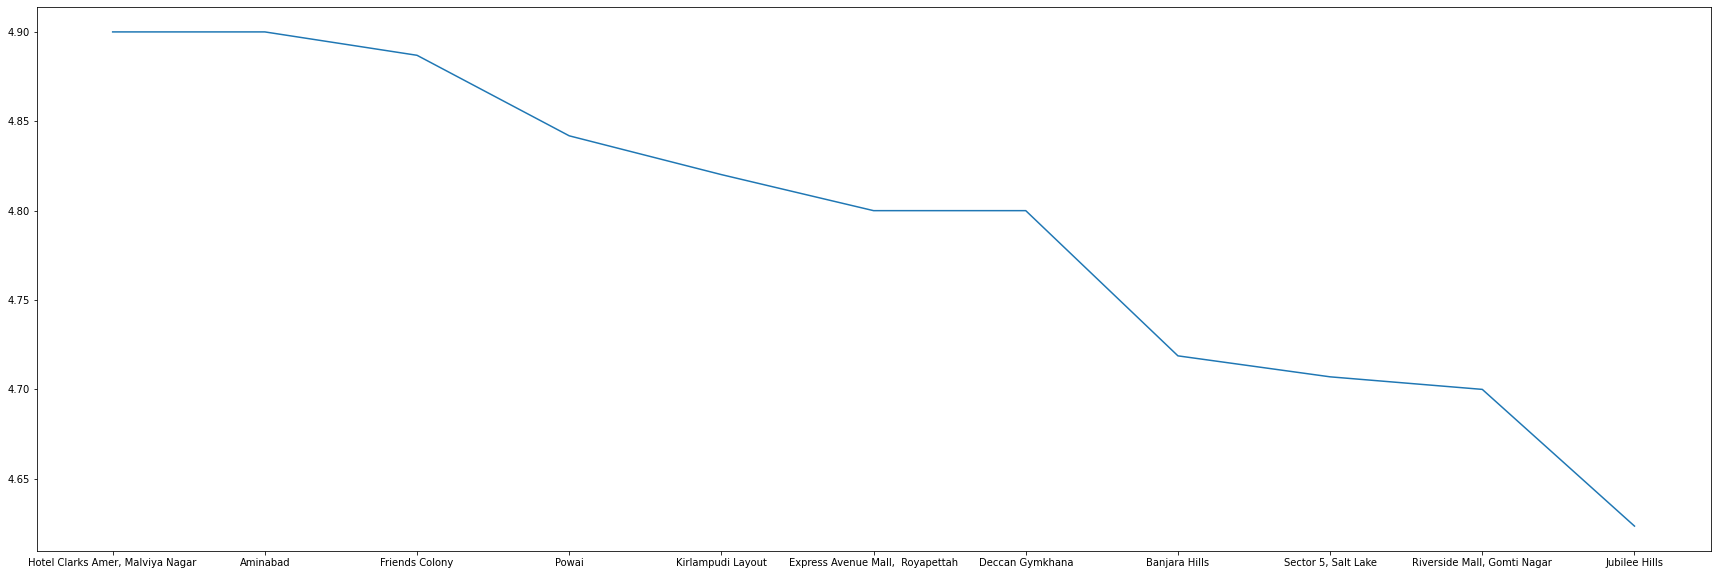

In [110]:
#print(d)
d=dict(sorted(d.items(),key= lambda kv:(kv[1],kv[0]),reverse=True))
flag = 0 
x = []
y = []
for i in d:
    flag += 1
    x.append(i)
    y.append(d[i])
    print(i , d[i])
    if(flag == 11) :
        break
plt.subplots(figsize=(30,10))
plt.plot(x,y)
plt.show()
    

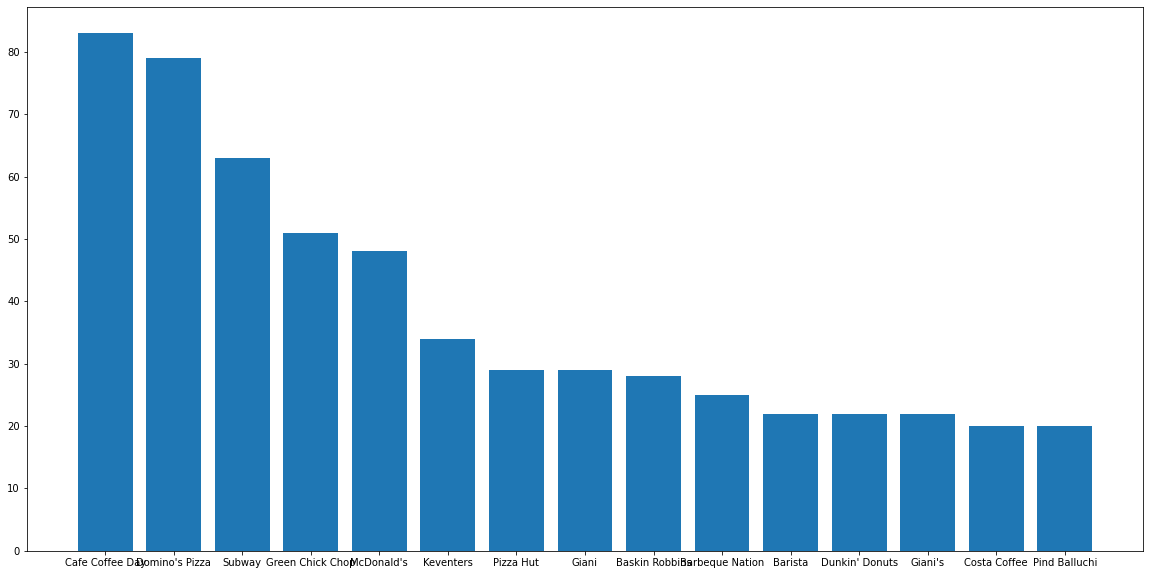

In [114]:
d=india_df['Restaurant Name'].value_counts()
x=list(d.index[0:15])
y=list(d.values[0:15])
plt.subplots(figsize=(20,10))
plt.bar(x,y)
plt.show()

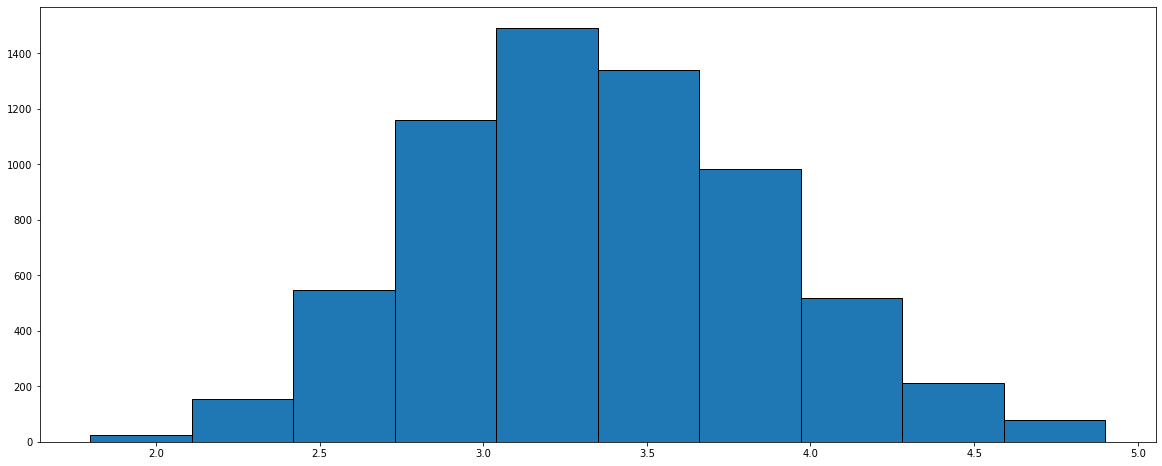

In [117]:
data=india_df[india_df['Aggregate rating']!=0]
x=list(data['Aggregate rating'])
plt.subplots(figsize=(20,8))
plt.hist(x,edgecolor = 'black')
plt.show()


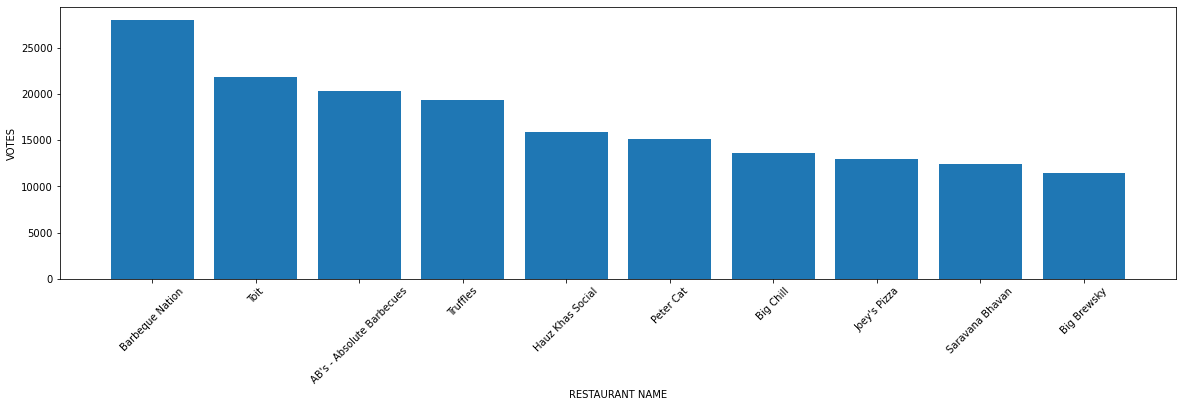

In [119]:

l=list(zip(india_df['Restaurant Name'],india_df['Votes']))
d={}
for i in range(len(l)):
    d[l[i][0]]=d.get(l[i][0],l[i][1])+l[i][1]
d=dict(sorted(d.items(),key=lambda kv:(kv[1],kv[0]),reverse=True))
x=list(d.values())[0:10]
y=list(d.keys())[0:10]
plt.subplots(figsize=(20,5))
plt.bar(y,x)
plt.xlabel('RESTAURANT NAME')
plt.ylabel('VOTES')
plt.xticks(rotation=45)
plt.show()

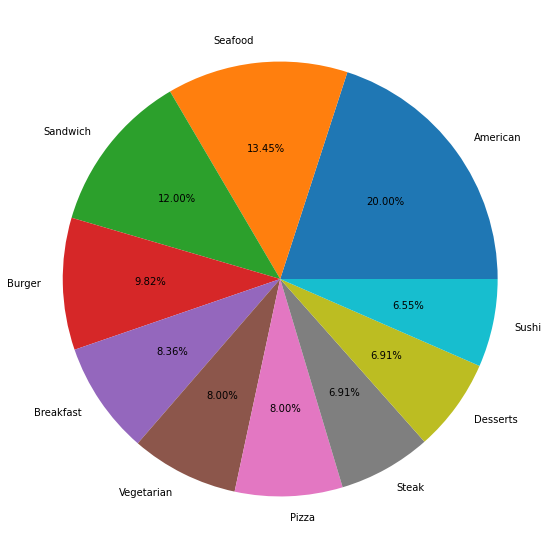

In [121]:
d=df[df['Country Code']==216]
x=d['Cuisines'].value_counts()
dic={}
for ele in list(x.index):
    li=[y.strip() for y in ele.split(',')]
    for y in li:
        dic[y]=dic.get(y,0)+1
dic=dict(sorted(dic.items(),key=lambda kv:(kv[1],kv[0]),reverse=True))
y=list(dic.values())[0:10]
x=list(dic.keys())[0:10]
plt.subplots(figsize=(20,10))
plt.pie(y,labels=x,autopct='%.2f%%')
plt.show()


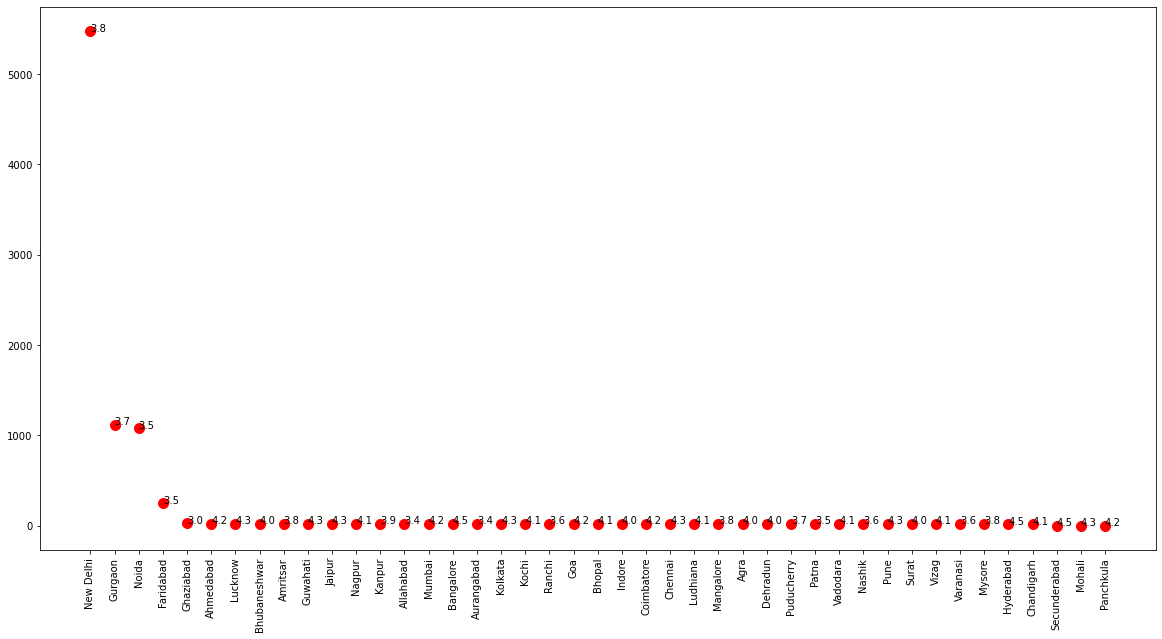

In [124]:
li=india_df['City'].value_counts()
x=list(li.index)
y=list(li.values)
z=[]
d={}
for ele in x:
    a=india_df[india_df['City']==ele]['weighted_average'].sum()
    b=india_df[india_df['City']==ele]['Votes'].sum()
    val=(a/b)
    z.append(val)
    d[ele]=d.get(ele,val)+val
for ele in d:
    d[ele]=round(d[ele],1)
plt.subplots(figsize=(20,10))
plt.scatter(x,y,s=100,color='red')
plt.xticks(rotation=90)
for i in range(len(x)):
    plt.text(x[i],y[i],round(z[i],1))
plt.show()